<a href="https://colab.research.google.com/github/aimlresearcher/AI-COURSE/blob/main/02_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth First Search

In [1]:
# DFS function to find a path to the goal
def dfs(graph, start, goal):
    stack = [start]  # DFS stack
    visited = set([start])  # Track visited nodes
    parent = {start: None}  # Track parent nodes for path reconstruction

    while stack:
        current = stack.pop()  # Get last element from stack

        # If goal is found, reconstruct the path
        if current == goal:
            return reconstruct_path(parent, goal)

        for neighbor in reversed(graph.get(current, [])):  # Reversed to maintain DFS order
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                stack.append(neighbor)

    return None  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define graph connections as adjacency list
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']
}

# Define Start and Goal nodes
start_node = "S"
goal_node = "A"

# Run DFS and print the path found
dfs_path = dfs(graph, start_node, goal_node)

if dfs_path:
    print("\nDFS Path Found:", " → ".join(dfs_path))
else:
    print("\nGoal not found in the graph.")



DFS Path Found: S → E → B → A


# Depth First Search With networkx Library
Red → Current node being explored.
Green → Nodes in stack.
Blue → Visited nodes.
Gray → Unvisited nodes.

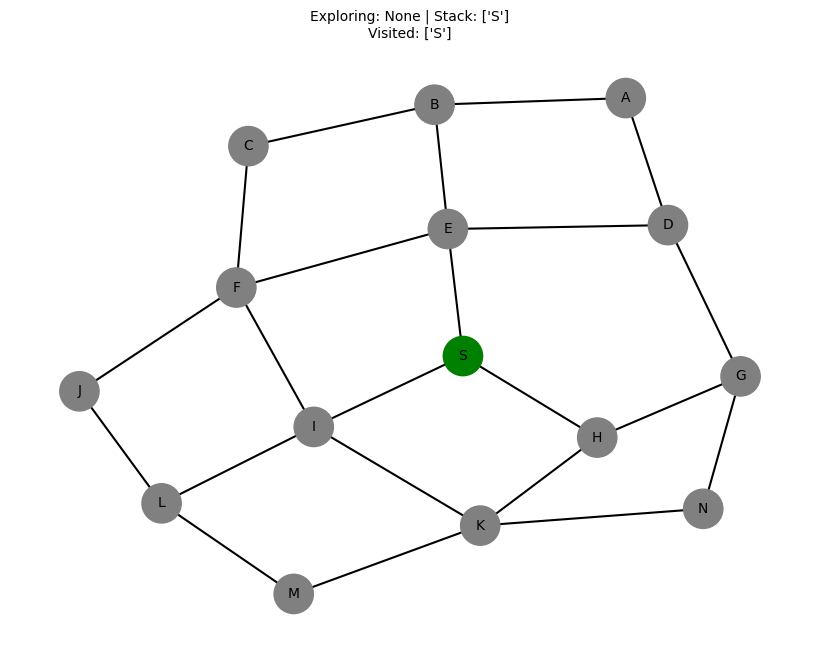

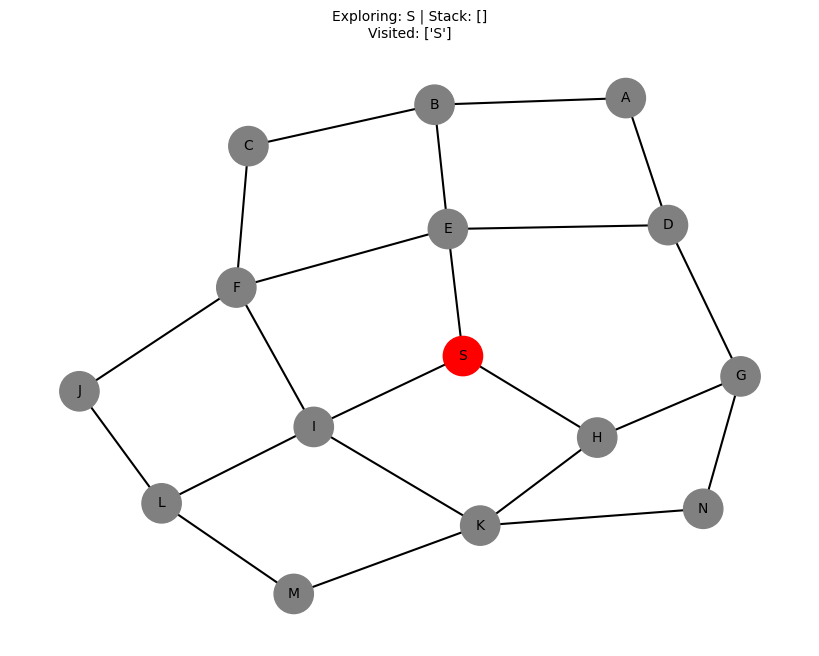

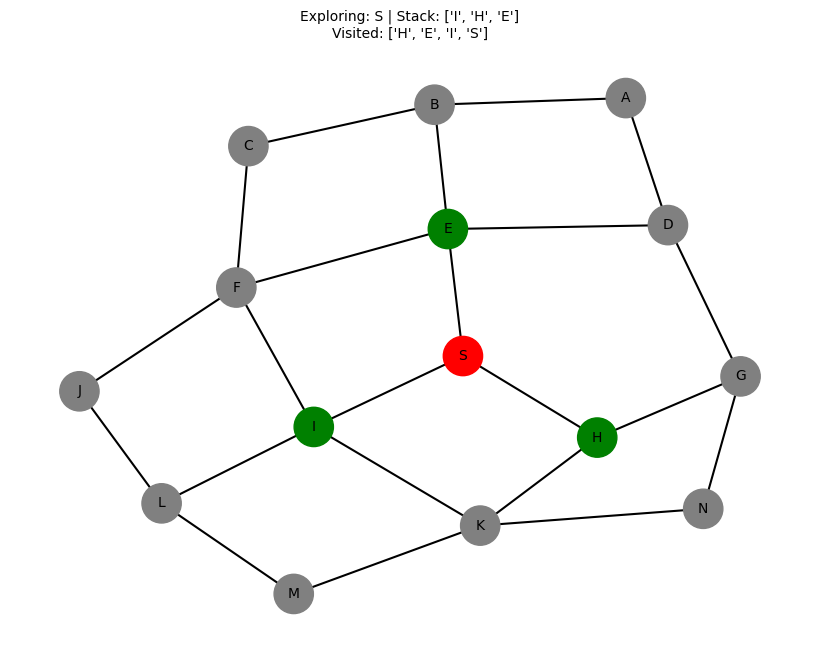

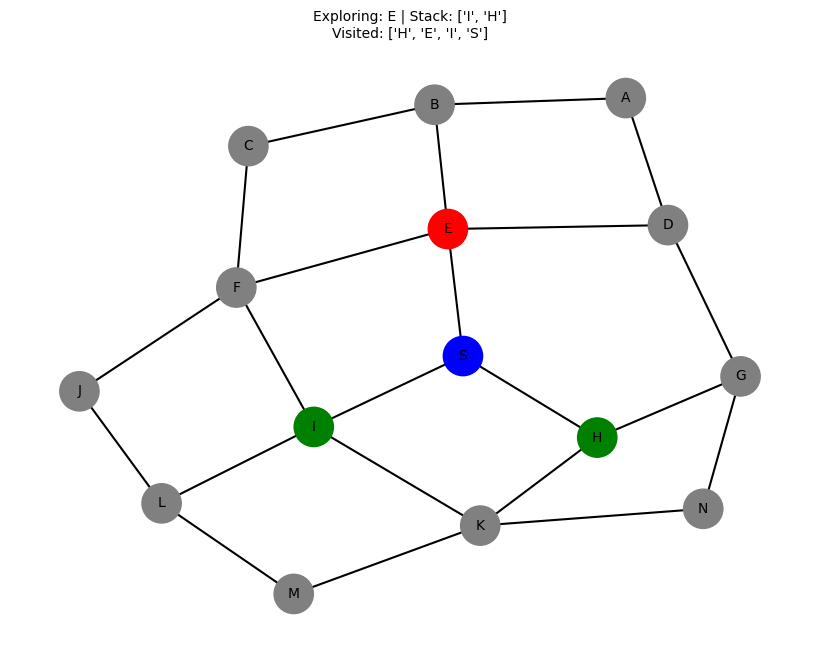

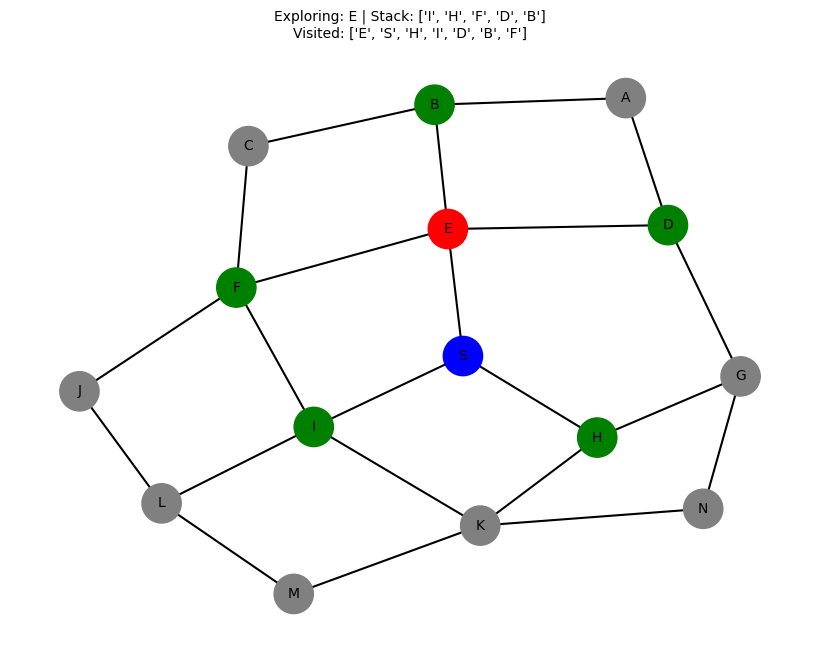

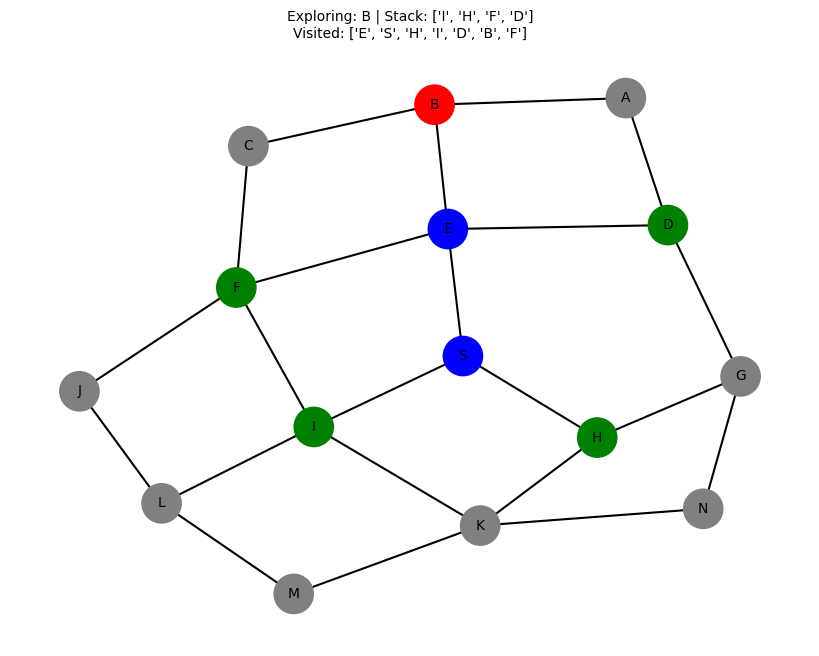

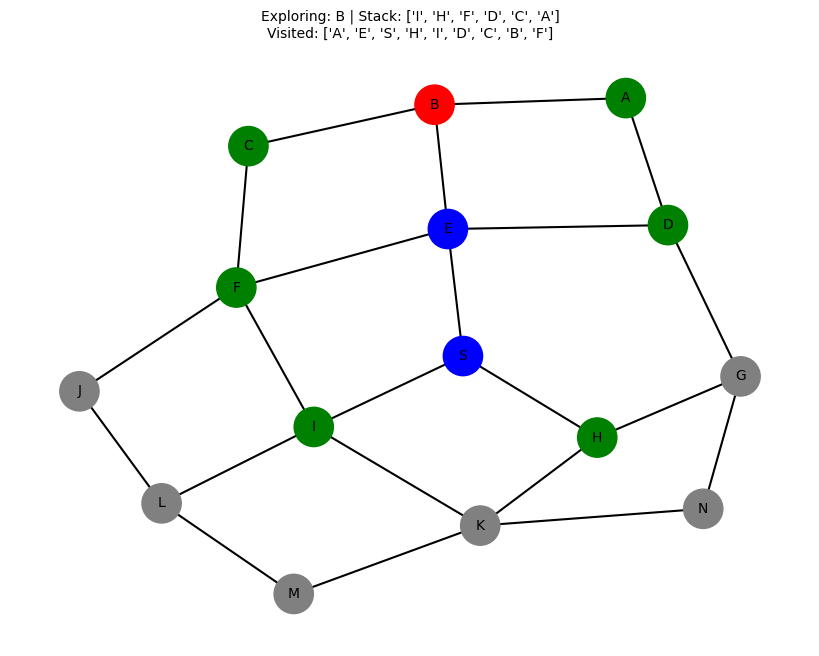

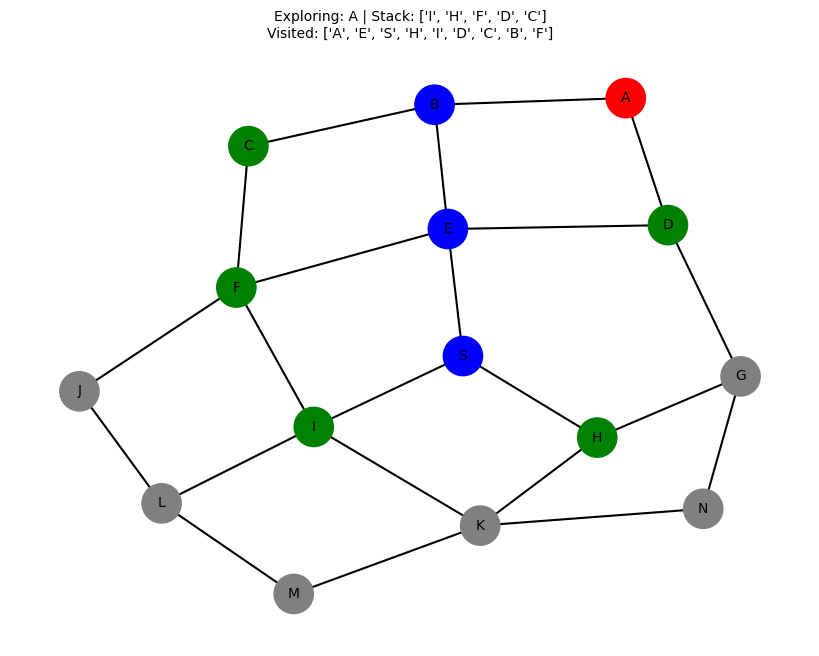

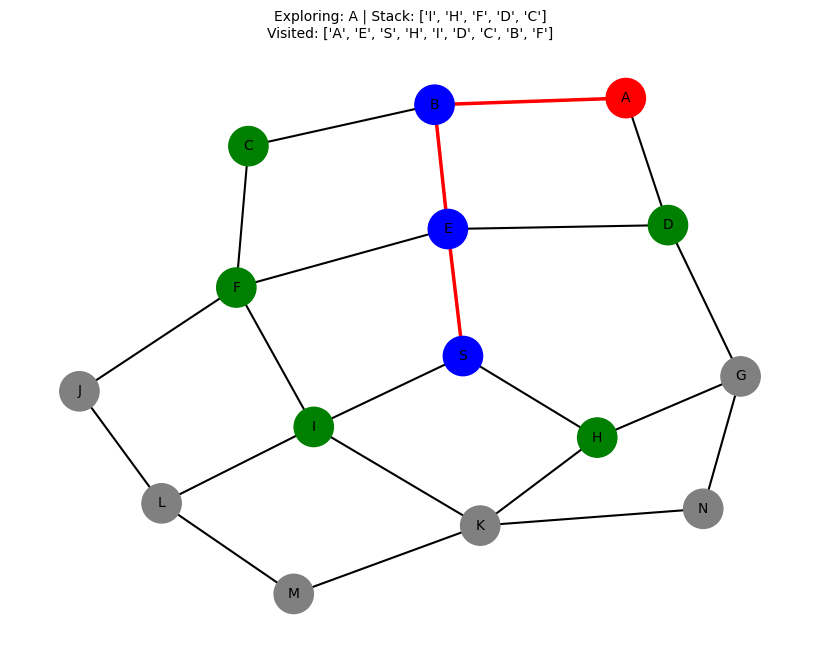


DFS Path Found: S → E → B → A


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

# Define graph connections
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']
}

# Create an undirected graph
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Function to draw the graph at each DFS step
def draw_graph(G, visited, stack, current, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    # Assign colors to nodes
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being explored
        elif node in stack:
            node_colors.append('green')  # Nodes in stack (frontier)
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="black", width=1.5, font_size=10)

    # Highlight the final shortest path in red
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title(f"Exploring: {current} | Stack: {list(stack)}\nVisited: {list(visited)}", fontsize=10)
    plt.show()
    time.sleep(1)  # Pause for better visualization

# DFS function with step-by-step visualization
def dfs_visualize(G, start, goal):
    stack = [start]  # DFS stack
    visited = set([start])  # Visited set
    parent = {start: None}  # Parent tracking for path reconstruction

    draw_graph(G, visited, stack, None)  # Initial state

    while stack:
        current = stack.pop()  # Pop from stack (LIFO)
        draw_graph(G, visited, stack, current)  # Draw after popping from stack

        if current == goal:
            path = reconstruct_path(parent, goal)
            draw_graph(G, visited, stack, current, path)  # Highlight final path
            return path

        # **Fix: Convert neighbors to list before reversing**
        for neighbor in reversed(list(G.neighbors(current))):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                stack.append(neighbor)

        draw_graph(G, visited, stack, current)  # Draw after adding neighbors

    return None  # Goal not found

# Reconstruct the shortest path using parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "S"
goal_node = "A"  # Modify as needed

# Run DFS with Visualization
dfs_path = dfs_visualize(G, start_node, goal_node)

# Print the shortest path result
if dfs_path:
    print("\nDFS Path Found:", " → ".join(dfs_path))
else:
    print("\nGoal not found in the graph.")
